C:\Users\UOS\AppData\Local\Temp\ipykernel_7392\2633746767.py:39: RuntimeWarning: invalid value encountered in sqrt
  x = x - lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


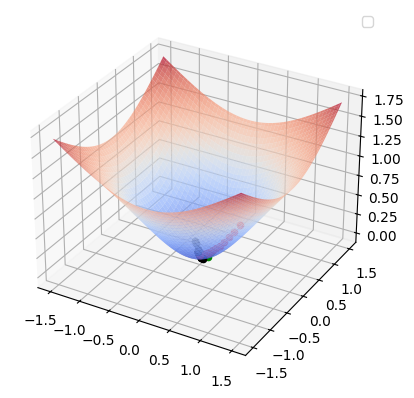

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the S-shaped function to minimize
def f(x, y):
    return np.log(1 + x**2 + y**2)

# Define the gradients
def grad_f(x, y):
    r2 = x**2 + y**2
    return np.array([2*x / (1 + r2), 2*y / (1 + r2)])

# Gradient Descent Algorithms
def sgd(x, y, lr=0.1):
    grad = grad_f(x, y)
    return x - lr * grad[0], y - lr * grad[1]

def momentum(x, y, lr=0.1, momentum=0.9):
    global v
    grad = grad_f(x, y)
    v = momentum * v - lr * grad
    return x + v[0], y + v[1]

def rmsprop(x, y, lr=0.1, rho=0.9, epsilon=1e-6):
    global E_grad
    grad = grad_f(x, y)
    E_grad = rho * E_grad + (1 - rho) * grad**2
    adjusted_lr = lr / (np.sqrt(E_grad) + epsilon)
    return x - adjusted_lr[0] * grad[0], y - adjusted_lr[1] * grad[1]

def adam(x, y, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
    global m, v, t
    grad = grad_f(x, y)
    t += 1
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad**2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    x = x - lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
    y = y - lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
    return x, y

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)

# Initialize the points
points = {'SGD': [0.5, 0.5], 'Momentum': [0.5, -0.5], 'RMSprop': [-0.5, 0.5], 'Adam': [1.0, 1.0]}

# Initialize variables for momentum, rmsprop, and adam
v = np.array([0.0, 0.0])
E_grad = np.array([0.0, 0.0])
m = np.array([0.0, 0.0])
t = 0

# Colors for different algorithms
colors = {'SGD': 'red', 'Momentum': 'green', 'RMSprop': 'black', 'Adam': 'blue'}

# Perform and plot the next steps
steps = 100
for step in range(steps):
    for key, (x, y) in points.items():
        if key == 'SGD':
            x, y = sgd(x, y)
        elif key == 'Momentum':
            x, y = momentum(x, y)
        elif key == 'RMSprop':
            x, y = rmsprop(x, y)
        elif key == 'Adam':
            x, y = adam(x, y)
        points[key] = [x, y]
        ax.scatter(x, y, f(x, y), color=colors[key])

# Add legend
ax.legend()
plt.show()


-1.112673453216003 0.868526546783997
-1.0962446131807355 0.8275091797028074
-1.0859721486371214 0.8221114176249344
-1.0752847462183242 0.8225734093735417
-1.0627655278666817 0.8245951872038462
-1.0474709907579915 0.8273343114267343
-1.0282404811436254 0.8307180348930621
-1.0033667697776052 0.8349035951260674
-0.9702193770533944 0.8401809343185029
-0.9247068462037304 0.8469859501578987
-0.8606781084590366 0.8559392236271808
-0.7702223915832819 0.8678337927822589
-0.6487091902950364 0.8833508950034114
-0.5113106376840327 0.9020022058784243
-0.4032621412977209 0.9203579053773417
-0.3490065592266254 0.9332638522711433
-0.3275887705343055 0.9396936938565671
-0.31951813103164606 0.9423415733727576
-0.3164855803962816 0.9433596800017265
-0.31534528423623615 0.9437433163788194
-0.31491640480950644 0.9438872345846969
-0.3147551041966412 0.9439412202969574
-0.314694445130055 0.9439614863019352
-0.3146716352825074 0.9439690990665669
-0.3146630584264384 0.9439719599551499
-0.314659833484134 0.9439

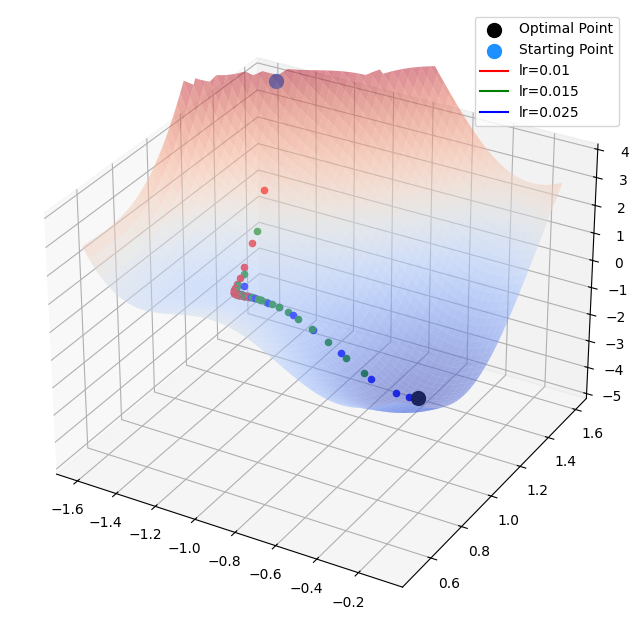

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function with local and global minima
def f(x, y):
    return (x**2 + y**2 - 1)**2 + 1 * np.sin(5 * x) + 1 * np.sin(5 * y)

# Define the gradients
def grad_f(x, y):
    dx = 4 * x * (x**2 + y**2 - 1) + 5 * np.cos(5 * x)
    dy = 4 * y * (x**2 + y**2 - 1) + 5 * np.cos(5 * y)
    return np.array([dx, dy])

# Gradient Descent Algorithm (SGD)
def sgd(x, y, lr=0.1):
    grad = grad_f(x, y)
    return x - lr * grad[0], y - lr * grad[1]

# Initialize the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1.6, -0.1, 100)
Y = np.linspace(0.5, 1.6, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
# Set the z-axis limit
zlim_min, zlim_max = -5, 6
ax.set_zlim(zlim_min, zlim_max)

# Mask Z values outside the zlim range
Z = np.where((Z >= zlim_min) & (Z <= zlim_max), Z, np.nan)

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5, zorder=3,)

ax.scatter( -0.3146579,0.94397367, f(0.94397367 ,-0.3146579), color='black', s=100, zorder=1, label='Optimal Point')
ax.scatter( -1.3,1.3, f(-1.3,1.3), color='dodgerblue', s=100, zorder=1, label='Starting Point')


# Initialize the points
initial_point = [-1.3, 1.3]
learning_rates = [0.01, 0.015, 0.025]

# Colors for different learning rates
colors = ['red', 'green', 'blue']
labels = [f'lr={lr}' for lr in learning_rates]

# Perform and plot the next steps for different learning rates
steps = 30
for lr, color, label in zip(learning_rates, colors, labels):
    x, y = initial_point

    for step in range(steps):
        x, y = sgd(x, y, lr)
        ax.scatter(x, y, f(x, y), color=color, zorder=2)
    
        if lr ==0.025:
            print(x,y)
    ax.plot([], [], color=color, label=label)


# Add legend
ax.set_zlim(-5,4)
ax.legend()
plt.show()


# Q2

다음 함수 $f(x,y)$에서 $Gradient$를 구하고

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function
def f(xy):
    x, y = xy
    return (x**2 + y**2 - 1)**2 + np.sin(5 * x) + np.sin(5 * y)

# Initial guess (on the unit circle)
initial_guess = [1, 0]

# Find the minimum
result = minimize(f, initial_guess)
global_minimum = result.x
global_minimum_value = result.fun

print("Global minimum point (x, y):", global_minimum)
print("Global minimum value:", global_minimum)

Global minimum point (x, y): [ 0.94397367 -0.3146579 ]
Global minimum value: [ 0.94397367 -0.3146579 ]
